In [2]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
import sys
%matplotlib inline

In [3]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.6 (v3.6.6:4cf1f54eb7, Jun 27 2018, 03:37:03) [MSC v.1900 64 bit (AMD64)]
Tensorflow version 1.12.0
Pandas version 0.23.4
Numpy version 1.15.0


In [4]:
# Create Training Data
# y = m*x + b
# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)
# let's compute train_y using 0.1 for m and 0.3 for b
train_y = 0.1 * train_x + 0.3

In [5]:
df = pd.DataFrame({'x':train_x, 'y': train_y})
df.head()

,x,y
0,0.016055,0.301606
1,0.520240,0.352024
2,0.763637,0.376364
3,0.272880,0.327288
4,0.685748,0.368575


In [6]:
df.describe()

,x,y
count,100.000000,100.000000
mean,0.472658,0.347266
std,0.295586,0.029559
min,0.001845,0.300185
25%,0.227366,0.322737
50%,0.483254,0.348325
75%,0.705917,0.370592
max,0.990790,0.399079


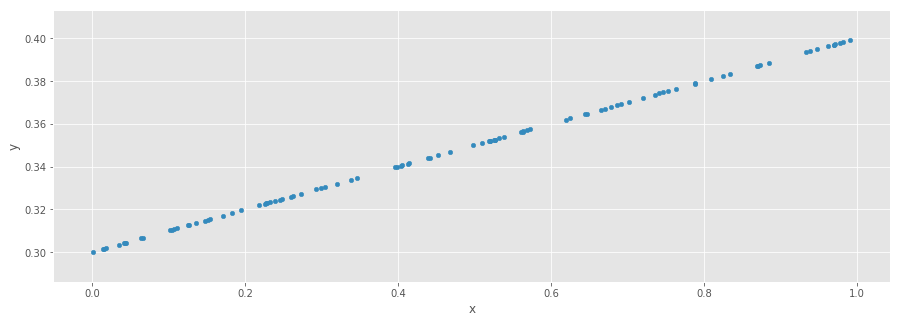

In [7]:
df.plot.scatter(x='x', y='y', figsize=(15,5))

In [8]:
# Create Test Data
# This is the data we are going to use to make sure our model is generating good predictions
test_x = np.random.rand(100).astype(np.float32)

In [15]:
# Model your Graph
# placeholders
x = tf.placeholder(tf.float32, name='01_x')
y = tf.placeholder(tf.float32, name='01_y')

# variables
# Note that np.random.rand() is used to initialize your variable
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = tf.multiply(W, x) + b

# minimize the mean squared errors
# as mentioned above there are other ways to measure the error between train_y and pred
loss = tf.reduce_mean(tf.square(pred-y))

# we pick our optimizer and a learning rate
optimizer = tf.train.GradientDescentOptimizer(0.7)

# we train our model by minimizing our loss function
train = optimizer.minimize(loss)

In [16]:
# Time to Train
# initialize the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)
    
    # fit the function
    for step in range(200):
        # get your data
        train_data = {x:train_x, y:train_y}
        # training in progress...
        sess.run(train, feed_dict=train_data)
        # print the last 20 results
        if step > 180:
            print(step, sess.run(W), sess.run(b))
    
    # note that W and b match the line we are trying to model (y=0.1x+0.3)
    print("Training completed:", "W=", sess.run(W), "b=", sess.run(b))
    
    # run your trained model on the test data set
    test_results = sess.run(pred, feed_dict={x: test_x})
    # capture the predicted results so you can plot them
    df_final = pd.DataFrame({'test_x':test_x, 'pred':test_results})

181 0.10000005 0.29999998
182 0.10000005 0.29999998
183 0.10000005 0.29999998
184 0.10000005 0.29999998
185 0.10000005 0.29999998
186 0.10000005 0.29999998
187 0.10000005 0.29999998
188 0.10000005 0.29999998
189 0.10000005 0.29999998
190 0.10000005 0.29999998
191 0.10000005 0.29999998
192 0.10000005 0.29999998
193 0.10000005 0.29999998
194 0.10000005 0.29999998
195 0.10000005 0.29999998
196 0.10000005 0.29999998
197 0.10000005 0.29999998
198 0.10000005 0.29999998
199 0.10000005 0.29999998
Training completed: W= 0.10000005 b= 0.29999998


Text(0.5,0,'x')

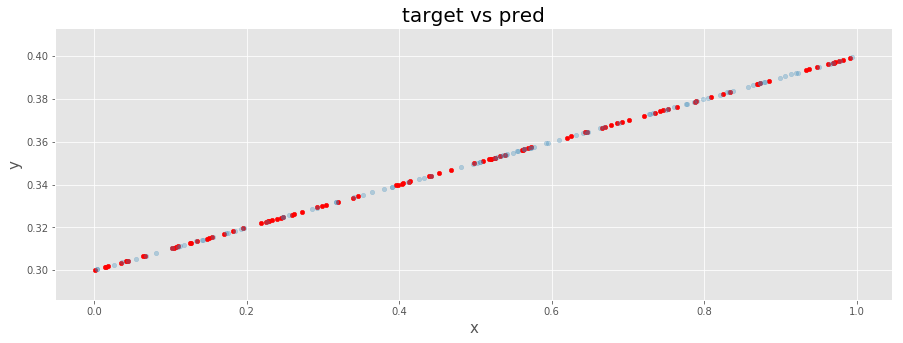

In [17]:
# Plot the Training Data vs the Test Data
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')
# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)
# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)